# Assessing & Exploring 
Use [README file](http://www.fueleconomy.gov/feg/epadata/Readme.txt) or [This pdf](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to know more abou the datasets and columns\
Explore `all_alpha_08.csv` and `all_alpha_18.csv` and the questions below.

In [1]:
# 1- number of samples in each dataset?
# 2- number of columns in each dataset? 
# 3- duplicate rows in each dataset? 
# 4- number of features with missing values in both datasets?
# 5- datatypes of columns in each dataset ?
# 6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#           
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)?
# 8- how is the column "cyl" different in both datasets? (checkbox)
#                  A- Datatype  B- Number of unique value C- No of samples
# 9- What are the types of fuel present in each dataset ?
# 10- What are the fuel types that exist in a dataset and not the other? 

In [2]:
# import
import pandas as pd
import numpy as np
df8 = pd.read_csv('all_alpha_08.csv')
df18 = pd.read_csv('all_alpha_18.csv')

In [3]:
# 1- number of samples and columns in each dataset? 
print('Samples in 2008:', df8.shape[0])
print('Columns in 2008:', df8.shape[1])
print('Samples in 2018:', df18.shape[0])
print('Columns in 2018:', df18.shape[1])

Samples in 2008: 2404
Columns in 2008: 18
Samples in 2018: 1611
Columns in 2018: 18


In [4]:
# 3- duplicate rows in each dataset?
print('Duplicated in 2008:', sum(df8.duplicated()))
print('Duplicated in 2018:', sum(df18.duplicated()))

Duplicated in 2008: 25
Duplicated in 2018: 0


In [5]:
# 4- number of features with missing values in 2008?
df8.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [6]:
# 4- number of features with missing values in 2018?
df18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [7]:
# 5- datatypes of columns in each dataset ?
df8.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [8]:
df18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [9]:
#6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
print('Greenhouse Gas Score, ', 'Cyl, ', 'Air Pollution Score')

Greenhouse Gas Score,  Cyl,  Air Pollution Score


In [10]:
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)
df8.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [11]:
df18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [12]:
# 8- how is the column "Cyl" different in both datasets?
print('The column has different datatypes between the datasets, with 8 unique values in 2008 and 7 in 2018')

The column has different datatypes between the datasets, with 8 unique values in 2008 and 7 in 2018


In [13]:
# 9- What are the types of fuel present in each dataset ?
df8['Fuel'].value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [14]:
df18['Fuel'].value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

In [15]:
# 10- What are the fuel types that exist in a dataset and not the other? 
print('CNG,', 'Ethanol,', 'Electricity,', 'Gasoline/Electricity')

CNG, Ethanol, Electricity, Gasoline/Electricity


# Cleaning

## Cleaning - Column Labels

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:\
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'\
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [16]:
# drop the columns from 2008
df8 = df8.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis = 1)

In [17]:
# drop the columns from 2018
df18 = df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1)

## Cleaning -  Rename Columns
**Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.**\
**Rename all column labels to replace spaces with underscores and convert everything to lowercase.**\
(Underscores can be much easier to work with in Python than spaces.\
For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query().\
Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [18]:
# rename the column
df8.rename(columns = {'Sales Area' : 'Cert Region'}, inplace = True)

In [19]:
# fix columns in both datasets
for i in df8.columns:
    if ' ' in i:
        df8.rename(columns = {i : i.replace(' ', '_').lower()}, inplace = True)
    df8.rename(columns = { i : i.lower()}, inplace = True)
    
for i in df18.columns:
    if ' ' in i:
        df18.rename(columns = {i : i.replace(' ', '_').lower()}, inplace = True)
    df18.rename(columns = {i : i.lower()}, inplace = True)

In [20]:
# confirm that both datasets share the exact column names:
print(df8.columns)
print(df18.columns)

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')
Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')


In [21]:
# save the new datasets as "data_08_v1.csv" and 'data_18_v1.csv'.
df8.to_csv('data_08_v1.csv', index = False)
df18.to_csv('data_18_v1.csv', index = False)

## Cleaning - Filter, Drop Nulls, Dedupe
For consistency, only compare cars certified by California standards.\
Filter both datasets using query to select only rows where "cert_region" is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

Use `data_08_v1.csv` and `data_18_v1.csv` that you just saved


### Filter by Certification Region

In [22]:
# filter datasets for rows following California standards using query
df8 = pd.read_csv('data_08_v1.csv')
df18 = pd.read_csv('data_18_v1.csv')

In [23]:
df8 = df8.query('cert_region == "CA"')
df18 = df18.query('cert_region == "CA"')

In [24]:
# confirm only certification region is California
df8['cert_region'].unique()

array(['CA'], dtype=object)

In [25]:
df18['cert_region'].unique()

array(['CA'], dtype=object)

In [26]:
# drop certification region columns form both datasets
df8.drop('cert_region', axis = 1, inplace = True)
df18.drop('cert_region', axis = 1, inplace = True)

### Drop Rows with Missing Values

In [27]:
# drop rows with any null values in both datasets
df8.dropna(axis = 0, inplace = True)
df18.dropna(axis = 0, inplace = True)

In [28]:
# checks if any of the columns have null values
df8.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [29]:
df18.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### Dedupe Data

In [30]:
# print number of duplicates in 2008 and 2018 datasets
sum(df8.duplicated())

23

In [31]:
sum(df18.duplicated())

3

In [32]:
# drop duplicates in both datasets
df8.drop_duplicates(inplace = True)
df18.drop_duplicates(inplace = True)

In [33]:
# confirm your changes
print(sum(df8.duplicated()))
print(sum(df18.duplicated()))

0
0


In [34]:
# check the shape of each dataset -- if the 2008 size isn't (986,13) and 2018 (794,13), you should probably cry.
df8.shape

(986, 13)

In [35]:
df18.shape

(794, 13)

In [36]:
# make a checkpoint in case you mess up anything later
df8.to_csv('data_08_v2.csv', index=False)
df18.to_csv('data_18_v2.csv', index=False)

## Cleaning - Fixing Data Types


### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [37]:
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv')

In [38]:
# extract int from string in cyl in the 2008 dataset
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [39]:
# convert the data type of the "cyl" column in the 2018 dataset from float to int 
df_18['cyl'] = df_18['cyl'].astype('int')

In [40]:
# verify that the data type of the column in both datasets is "int"
print(df_08['cyl'].dtype)
print(df_18['cyl'].dtype)

int32
int32


### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [41]:
# try to change the data type to float
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

In [ ]:
# you should have faced an error, get the row that caused that error
df_08[df_08.air_pollution_score == '6/4']

# It's not just the air pollution score!
The cars that have more than one type of fuel in a single row are hybrid (run on more than one type of fuel)! Multiple columns will be affected too!\
    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."\
This is why you can see that multiple columns contain more than one value


In [ ]:
# You have two options here: (1) Split the row by "/" into two rows, (2) just drop the rows that contain the ("/") in any of the columns
# You will lose a point for each dataset if you go with the second option

In [ ]:
# to split the rows---->
# 1- get the rows that contain / in the fuel column
temp_08 = df_08[df_08['fuel'].str.contains('/')]
# 2- make two copies of these rows
temp1_08 = temp_08.copy() 
temp2_08 = temp_08.copy() 
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the / 
for i in columns:
    temp1_08[i] = temp1_08[i].apply(lambda x: x.split("/")[0])
    temp2_08[i] = temp2_08[i].apply(lambda x: x.split("/")[1])
# 5- drop the original row from the dataset
df_08.drop(temp_08.index, inplace=True)
# 6- append the newely created rows to the original dataframe
df_08 = df_08.append(temp1_08.append(temp2_08), ignore_index=True)
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)

This is the row before splitting\
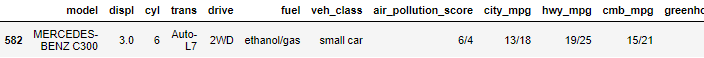

This what it should look like after splitting\
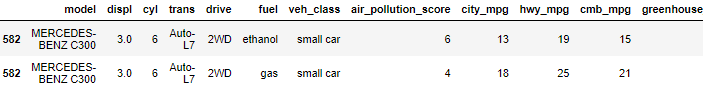

In [ ]:
# check that there are no hybrid cars in the 2008 dataset anymore:
df_08[df_08['fuel'].str.contains('/')]

### Repeat this process for the 2018 dataset

In [ ]:
# do whatever you did in the previous cells
# to split the rows---->
# 1- get the rows that contain / in the fuel column
temp_18 = df_18[df_18['fuel'].str.contains('/')]
# 2- make two copies of these rows
temp1_18 = temp_18.copy() 
temp2_18 = temp_18.copy() 
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the / 
for i in columns:
    temp1_18[i] = temp1_18[i].apply(lambda x: x.split("/")[0])
    temp2_18[i] = temp2_18[i].apply(lambda x: x.split("/")[1])
# 5- drop the original row from the dataset
df_18.drop(temp_18.index, inplace=True)
# 6- append the newely created rows to the original dataframe
df_18 = df_18.append(temp1_18.append(temp2_18), ignore_index=True)
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)

In [ ]:
df_18[df_18['fuel'].str.contains('/')]

In [ ]:
# now, try to change the data type again

# for 2008, convert string to float
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
# for 2018, convert int to float
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [ ]:
# check the data type of the columns
df_08.info()

In [ ]:
# convert to float
df_08.hwy_mpg = df_08.hwy_mpg.astype(float)
df_18.hwy_mpg = df_18.hwy_mpg.astype(float)

df_08.city_mpg = df_08.city_mpg.astype(float)
df_18.city_mpg = df_18.city_mpg.astype(float)

df_08.cmb_mpg = df_08.cmb_mpg.astype(float)
df_18.cmb_mpg = df_18.cmb_mpg.astype(float)


## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [ ]:
# convert the data type from float to int in the 2008 dataset
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(int)

In [ ]:
#### check that all columns and their data type in the 2008 dataset matches excatly the ones in the 2018 dataset
#### all columns MUST be the same data type
df_08.dtypes

In [ ]:
# check the shape of both datasets
df_18.dtypes

In [ ]:
# Save your final CLEAN datasets as "clean_08.csv" and "clean_18.csv"
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)